<h1 align='center'> SMC - TD5 </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>
<h3> Antithetic & control variables  </h3>

In [13]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

Soit $X = (X_1, \dots, X_d)$ un vecteur gaussian. On se propose d'estimer la probabilité d'appartenir à une région définie par $$ A = \{ (x_1, \dots, x_d) \quad \quad \left|\prod_{i=1}^d x_i\right| \leq C \}$$

La méthode simple (et naïve) consiste à sampler des points et simplement compter le nombre de points qui y sont tombés, formellement l'estimateur Monte-Carlo $Y_n$:

$$ P(X \in A) = E(\unicode{x1D7D9}_A(X)) $$
Et donc on prend comme estimatateur: $Y_n = \frac{1}{n}\sum_{i=1}^n \unicode{x1D7D9}_A(X_i)$

In [14]:
def crude_mc(n, d=2, c=1, seed=None):
    """Crude Monte Carlo estimator"""
    rnd = np.random.RandomState(seed) # random generator
    
    mean = np.zeros(d)
    var = np.eye(d)
    X = rnd.multivariate_normal(mean, var, size=n) # Generate Gaussian sample
    prodx = np.prod(X, axis=1)
    
    Y = abs(prodx) <= c # indicator estimator
    Ybar = Y.mean()
    
    return Ybar

In [15]:
crude_mc(100000, d=2, c=1.)

0.7911

Comme variable de contrôle, on prend $W = \phi(X^{(1)}, \dots, X^{(d)}) = \left|\prod_{j=1}^d X^{(j)}\right|$
car W est corrélée avec $Y = \unicode{x1D7D9}_A(X)$ et en plus on connait a priori $\mu = E(W) = E(|X^{(1)}|)^d = (\frac{2}{\pi})^{d/2}$ et on pose:
$$ Z = Y + \alpha (W - \mu) $$

Minimiser la variance de Z en fonction de $\alpha$ donne $\alpha = - \frac{cov(W, Y)}{var(W)}$
La variance de W peut être calculée a priori: $Var(W) = 1 - (\frac{2}{\pi})^d$, en revanche $cov(W,Y)$ peut être approchée par l'estimateur empirique $\frac{1}{n-1} (w_i - \mu)(y_i - \bar{y_n})$

In [16]:
def control_var(n, d=2, c=0.1, seed=None, verbose=False):
    """Control variates estimator"""
    
    rnd = np.random.RandomState(seed)
    mean = np.zeros(d)
    var = np.eye(d)
    X = rnd.multivariate_normal(mean, var, size=n)
    
    prodx = np.prod(X, axis=1)
    Y = abs(prodx) <= c
    ybar = Y.mean()
    
    W = abs(prodx) # Control variates W
    mean_w =  (2 / np.pi) ** (d / 2) # mean and variance of W
    var_w = (1 - (2 / np.pi) ** d)
    cov_wy = (W - mean_w).dot(Y - ybar) / (n - 1) # Cov(W, Y)
    beta = - cov_wy / var_w
    
    Z =  ybar + beta * (W - mean_w).mean()
    
    return Z

In [17]:
control_var(1000, d=2, c=1.)

0.799970035421104

In [18]:
n, d, c = 10000, 10, 0.01
N = 100
sample_crude = [crude_mc(n, d=d, c=c) for _ in range(N)]
sample_ctr = [control_var(n, d=d, c=c) for _ in range(N)]

data = np.empty((N, 2))
data[:, 0] = sample_crude
data[:, 1] = sample_ctr


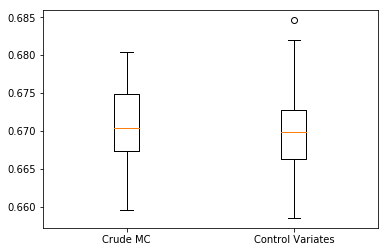

In [19]:
plt.figure()
plt.boxplot(data, labels=["Crude MC", "Control Variates"])
plt.show()